* **Alumno:** Cueva Flores, Jonathan Brandon
* **Docente:** Ana Maria Cuadros Valdivia



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Bibliotecas**

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from collections import defaultdict
from timeit import timeit
import time
from timeit import default_timer as timer
from math import isnan
import random 
from math import sqrt
import sys

# **Lectura y Formatizacion de Datos**

* Para el **dataset** de ***ratings*** se considero las columnas user_id, movie_id y ratings
  * Cantidad de usuarios 610
  * Cantidad de datos 100836

* Para el **dataset** de ***movies*** se considero las columnas movie_id, title y genres
  * Cantidad de peliculas 9742 

In [ ]:
ratings = "ratings.csv"
movies = "movies.csv"
ratings1m = "ratings.dat"
movies1m = "movies.dat"

In [ ]:
#Esta funcion se encarga de la lectura de datos para estructurarlos en un diccionario para facilitar el acceso
def load_data(name,types,separador=","):
    d = defaultdict(dict)#definimos un diccionario multidimensional
    f = open(name)
    i = 0
    val = []#vector para almacenar los elementos tokenizados
    for line in f:#bucle para leer linea por linea el archvo .csv
        line = line.strip('\n')#eliminamos el elemento de salto de linea de la linea leida
        #print(line)
        if i != 0:#condicion para evitar leer los headers del .csv
            val = line.split(separador)#tokenizamos la linea separandola por ,
            d[val[0]][val[1]] = types(val[2])#Insertamos los elementos en el diccionario
        i=1
    return d

def count_elapsed_time(f,k,funtion,users,umbral):
    nValues = []
    tValues = []
    for i in users.keys():
      start = time.time()
      f(k,funtion,i,users,umbral)
      end = time.time()
      nValues.append(int(i))
      tValues.append(end-start)
    return nValues,tValues



data = load_data(ratings,float,",")
data_movies = load_data(movies,str,",")
n_users = len(data.keys())
data_1m = load_data(ratings1m,float,"::")
data_movies_1m = load_data(movies1m,str,"::")
n_users_1m = len(data_1m.keys())

In [ ]:
print(n_users,len(data_movies.keys()))
print(n_users_1m,len(data_movies_1m.keys()))

610 9742
6040 3882


# **Funciones de Distancia y Correlacion**


1.   Implementar **distancia Manhattan**
2.   Implementar **distancia Euclidean**
3.   Implementar **Correlacion de Pearson**
  * Python
  * Numpy
  * Funcion Pre-definida
4.   Implementar **similitud del Coseno**
  * Python
  * Numpy






In [ ]:
def manhattan(key1, key2):
    distance = 0
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
        if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
            distance += abs(key1[i] - key2[i])
    #Esta condicion ayuda cuando los elementos no tienen ninguna coincidencia
    if distance != 0:
        return distance
    else:
        return sys.maxsize#sin coincidencias se retorna un int maximo

def euclidean(key1, key2):
    distance = 0
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
        if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
            distance += abs(key1[i] - key2[i])**2
    #Esta condicion ayuda cuando los elementos no tienen ninguna coincidencia
    if distance != 0:
        return sqrt(distance)
    else:
        return sys.maxsize#sin coincidencias se retorna un int maximo

def pearson_pyt(key1,key2):
    dimension = 0 #contador para saber si los elementos tienen alguna correlacion
    cal1 = 0
    cal2 = [0,0]
    cal3 = [0,0]
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
        if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
            #seccion de los calculos que se realizan para la funcion
            dimension+=1
            cal1 = cal1+key1[i]*key2[i]
            cal2[0] = cal2[0]+key1[i]
            cal2[1] = cal2[1]+key2[i]
            cal3[0] = cal3[0]+(key1[i]**2)
            cal3[1] = cal3[1]+(key2[i]**2)
    #condicion para verificar si la correlacion existe            
    if dimension!=0:
      cal5_n = math.sqrt(cal3[0]-cal2[0]**2/dimension) * math.sqrt(cal3[1]-cal2[1]**2/dimension)
      cal2_n = (cal1 - (cal2[0] * cal2[1]) / dimension)
    else:
      cal5_n = 0
    if cal5_n == 0:
      return 0
    return cal2_n/cal5_n

def pearson_numpy(key1,key2):
    a = []
    b = []
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
      if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
        a.append(key1[i])
        b.append(key2[i])
    c=np.corrcoef(a,b)[0, 1] #El valor almacenado en esta posicion corresponde a la correlacion
    if np.isnan(c):#verifico si el valor es nan y se le asigna 0 para definir una correlacion nula
      return 0
    else:
      return c

def pearson_num(key1,key2):
    dimension = 0 #contador para saber si los elementos tienen alguna correlacion
    a = []
    b = []
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
      if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
        a.append(key1[i])
        b.append(key2[i])
        dimension +=1
    #Operaciones algebraicas
    sum_xy = sum(np.array(a)*np.array(b))
    sum_x = sum(np.array(a))
    sum_y = sum(np.array(b))
    sum_x2 = sum(np.array(a)**2)
    sum_y2 = sum(np.array(b)**2)
    #condicion para verificar si la correlacion existe
    if dimension != 0:
        denominator = math.sqrt(sum_x2-sum_x**2/dimension)*math.sqrt(sum_y2-sum_y**2/dimension)
    else:
        denominator = 0
    if denominator == 0:
        return 0
    else:
        return (sum_xy-(sum_x*sum_y)/dimension) / denominator

def cos_python(key1,key2):
    dimension = 0 #contador para saber si los elementos tienen alguna correlacion
    cal1 = 0
    cal2 = [0,0]
    cal3 = [0,0]
    #Usamos un bucle para recorrer las peliculas del usuario1
    for i in key1:
        if i in key2:#condicion para verificar si una pelicula del usuario1 se encuentra en el usuario2
            dimension+=1
            cal1 = cal1+key1[i]*key2[i]
            cal2[0] = cal2[0]+key1[i]**2
            cal2[1] = cal2[1]+key2[i]**2
    #condicion para verificar si la correlacion existe
    if dimension!=0:
      cal3[0] = math.sqrt(cal2[0])
      cal3[1] = math.sqrt(cal2[1])
      cal5_n = cal3[0]*cal3[1]
    else:
      cal5_n = 0
    if cal5_n == 0:
      return 0
    return cal1/cal5_n

def cos_numpy(key1,key2):
    #extraemos las listas de peliculas de cada usuario
    a = np.array(list(key1.keys()))
    b = np.array(list(key2.keys()))
    #se verifican los elementos en la interseccion de peliculas entre los usuarios
    vect = np.intersect1d(a,b)
    dimension = len(vect) 
    a = []
    b = []
    for i in vect:
        a.append(key1[i])
        b.append(key2[i])
    sum_xy = sum(np.array(a)*np.array(b))
    sum_x2 = math.sqrt(sum(np.array(a)**2))
    sum_y2 = math.sqrt(sum(np.array(b)**2))
    
    return sum_xy/(sum_x2*sum_y2)

# **K-NN**

1.   Implementar K-nn
2.   Implementar Sistema de recomendacion de peliculas 


In [ ]:
'''Funcion para calcular los k vecinos mas cercanos'''
def kn(funtion,username, users):
    distances = []#vector que almacena pares de (distancia o correlacion, id_usuario)
    for user in users:#bucle para recorrerusuarios
        if user != username:#condicion para verificar que el usuario no sea el mismo con el que se compara
            distance = funtion(users[user], users[username])#llamada a la funcion para el calculo de la distancia o correlacion
            distances.append((distance, user))#agregar par de (distancia o correlacion, id_usuario)
    if funtion==manhattan or funtion==euclidean:#condicion para ordenar los datos de forma adecuada.
      distances.sort()
    else:
      distances.sort(reverse=True)
    return distances

def knn(k,funtion,username, users,umbral):
    d = []
    distances = kn(funtion,username, users)
    vecinos = distances[0:k]
    for i in vecinos:
      #print("Usuario: ",i[1],"\t Puntuacion: ",i[0])
      d.append([("USUARIO: ",i[1],"PUNTUACION: ",i[0])])
      nearest=i[1]
      film_r = []
      vecinosRatings = users[nearest]
      userRatings = users[username]
      for films in vecinosRatings:
          if not films in userRatings:
            if vecinosRatings[films] >= umbral:
              name_film = list(data_movies[films].keys())[0]
              film_r.append((films, vecinosRatings[films]))
      d.append(sorted(film_r, key=lambda index:index[1], reverse = True))
    return d


# **Grado de Influencia**


In [ ]:
def influence_grade(user_id, movie_id,users,k=3,funtion=pearson_pyt):
  vecinos = kn(funtion,user_id,users) #Se obtiene los k vecinos mas cercanos
  list_k = [] #Lista que almacena pares de (rating,distancia o similitud)
  sumador = 0 #contador de la suma de distancias o similitud para los k-vecinos
  for i in vecinos:#Bucle para recorrer los k-vecinos
    if len(list_k)>k-1: #Condicion para verificar cantidad de k_vecinos
      break
    vecinosRatings = users[i[1]]#vector de de peliculas para uno de los k-vecinos
    if i[0]!=0 and movie_id in vecinosRatings:#Verificar si la pelicula esta en el vector de vecinos
      list_k.append((vecinosRatings[movie_id],abs(i[0])))#agregar los pares
      sumador+=abs(i[0])#sumador de distancias o similitud
  array = [z[0]*(z[1]/sumador) for z in list_k]#Operaciones para predecir la puntuacion
  return list(data_movies[movie_id])[0], round(sum(array),1)


# **Funcion Insertar Nuevos Usuarios**

In [ ]:
def insert_user(users,films=10):
  new_users=n_users+1 #sumar un valor a la cantidad de usuarios.
  print("Nuevo usuario key: ",new_users)
  list_fils = list(data_movies.keys())
  for i in range(0,films):
    #film = str(input("Ingresar key de peliculas: "))
    film = random.choice(list_fils)#Valor random para clave de pelicula
    #score = float(input("El valor de puntuacion debe ser entre 0 - 5: "))
    score = round(random.uniform(1,5),1)#valor random de puntuacion para la pelicula
    #print(film,score)
    users[str(new_users)][str(film)]=score #Agregar elemento en la base de datos temporal
  return users,new_users #Pasar base de datos temporal y la cantidad de nuevos usuarios

# **Funcion Modelo de Evaluacion**

In [ ]:
'''Esta Funcion se encarga de analizar todas las peliculas que el usuario no a visto'''
def evaluate_influence(user_id,users,k=3,funtion=pearson_pyt,umbral=3,cont_film=100):
  user = user_id
  #interseccion entre la lista de todas las peliculas con las peliculas que el usuario vio
  data_influence = []
  #En la siguiente linea se extraen los elementos fuera de la interseccion y se toma una muestra de estos
  #usando la variable predeterminada("cont_film") por la funcion.
  data_movie = list(set(list(data_movies.keys())).symmetric_difference(list(data[user].keys())))[:cont_film]
  for movie_id in data_movie:
    #if not movie_id in users[user]:
      #for movie_id in arreglo:
      t_start = time.time()
      name,point = influence_grade(user,movie_id,users,k,funtion)#se calcula el grado de influencia
      #print(time.time()-t_start)
      if point>=umbral: #La condicion para validar peliculas filtradas por el umbral
        #print((movie_id,name,point))
        data_influence.append((name,point))
  #Ordena los datos por la puntuacion que tendrian
  return sorted(data_influence, key=lambda index:index[1], reverse=True)

## **Test de datos para recomendar peliculas**


1.   usuario: 147 con 20 peliculas 
2.   usuario: 414 con 2698 peliculas 
3.   usuario nuevo: 611 con mas de 8000 peliculas



In [ ]:
ssss = time.time()
influence_grade("147", "50",data)
print(time.time()-ssss)

0.01116180419921875


In [ ]:
data_influence = evaluate_influence("147",data)
print(len(data_influence))
for u in data_influence:
  print(u)

50
('Hunt for the Wilderpeople (2016)', 4.5)
('Girl Who Played with Fire- The (Flickan som lekte med elden) (2009)', 4.4)
('Farewell My Concubine (Ba wang bie ji) (1993)', 4.3)
('Juno (2007)', 4.2)
('Kung Fu Hustle (Gong fu) (2004)', 4.1)
('Trance (2013)', 4.0)
('Doctor Who: Voyage Of The Damned (2007)', 4.0)
('Sinbad: Legend of the Seven Seas (2003)', 4.0)
('Looking for Richard (1996)', 4.0)
('Dark Water (Honogurai mizu no soko kara) (2002)', 4.0)
('Idlewild (2006)', 4.0)
('TV Set- The (2006)', 4.0)
('Rocky Horror Picture Show- The (1975)', 4.0)
('Accidental Tourist- The (1988)', 4.0)
('Love & Mercy (2014)', 4.0)
('King of Masks- The (Bian Lian) (1996)', 4.0)
('White Balloon- The (Badkonake sefid) (1995)', 4.0)
('Letter to Three Wives- A (1949)', 4.0)
('Mandela: Long Walk to Freedom (2013)', 3.9)
('Monsieur Ibrahim (Monsieur Ibrahim et les fleurs du Coran) (2003)', 3.9)
('Star Trek Beyond (2016)', 3.8)
('Big (1988)', 3.8)
('Manhunter (1986)', 3.8)
('Game of Death (1978)', 3.8)
('28 Da

In [ ]:
data_influence = evaluate_influence("414",data)
print(len(data_influence))
for u in data_influence:
  print(u)

70
('All About My Mother (Todo sobre mi madre) (1999)', 4.8)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('Dead or Alive: Hanzaisha (1999)', 4.5)
("Internet's Own Boy: The Story of Aaron Swartz- The (2014)", 4.5)
('Love & Mercy (2014)', 4.3)
('Doctor Who: Voyage Of The Damned (2007)', 4.2)
('Stalingrad (1993)', 4.2)
('Dersu Uzala (1975)', 4.2)
('Game of Death (1978)', 4.1)
('LBJ (2017)', 4.0)
('Drained (O cheiro do Ralo) (2006)', 4.0)
('First Beautiful Thing- The (La prima cosa bella) (2010)', 4.0)
('Old Men: Robbers (1971)', 4.0)
('Dark Water (Honogurai mizu no soko kara) (2002)', 4.0)
('Idlewild (2006)', 4.0)
('TV Set- The (2006)', 4.0)
('Andrew Dice Clay: Dice Rules (1991)', 4.0)
('King of Masks- The (Bian Lian) (1996)', 4.0)
('Return to Never Land (2002)', 4.0)
('White Balloon- The (Badkonake sefid) (1995)', 4.0)
('Girl Who Played with Fire- The (Flickan som lekte med elden) (2009)', 4.0)
('Letter to Three Wives- A (1949)', 4.0)
('Impromptu (1991)', 4.0)
('House at the End of the 

In [ ]:
data,n_users = insert_user(data,20000)
#print(data[str(n_users)])
print("Con peliculas :", len(data[str(n_users)].keys()))

Nuevo usuario key:  611
Con peliculas : 8517


In [ ]:
user_tmp = str(n_users)
print("Nuevo usuario: ",n_users)
data_influence = evaluate_influence(user_tmp,data)
print(len(data_influence))
for u in data_influence:
  print(u)

Nuevo usuario:  611
68
('Only Lovers Left Alive (2013)', 5.0)
('The Bremen Town Musicians (1969)', 5.0)
('Mystery of the Third Planet- The (Tayna tretey planety) (1981)', 5.0)
('Bobik Visiting Barbos (1977)', 5.0)
('Affair to Remember- An (1957)', 4.9)
('Lifeguard- The (2013)', 4.9)
('Trial- The (ProcÃ¨s- Le) (1962)', 4.9)
('Harakiri (Seppuku) (1962)', 4.8)
('American Made (2017)', 4.7)
('Farewell My Concubine (Ba wang bie ji) (1993)', 4.6)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('Dead or Alive: Hanzaisha (1999)', 4.5)
('Killer Joe (2011)', 4.5)
('Bone Tomahawk (2015)', 4.5)
('Stoning of Soraya M.- The (2008)', 4.5)
('Never Cry Wolf (1983)', 4.2)
('Pledge- The (2001)', 4.2)
('White Balloon- The (Badkonake sefid) (1995)', 4.0)
('Savage Nights (Nuits fauves- Les) (1992)', 4.0)
('State of Grace (1990)', 4.0)
('A Cosmic Christmas (1977)', 4.0)
('Whole Nine Yards- The (2000)', 4.0)
('American Grindhouse (2010)', 4.0)
('This Is Spinal Tap (1984)', 4.0)
("Michael Jackson's Thriller (198

#**PRUEBAS**
* ### **EVALUACION PARA DIFERENTES K**
* ### **EVALUACION DE LOS METODOS**

In [ ]:
user = "414"
data_movie = list(set(list(data_movies.keys())).symmetric_difference(list(data[user].keys())))

Para la funcion **pearson** con diferentes k se tiene que a mayor numero de **k vecinos mas cercanos** se incrementa la valoracion que esta podria tener.

In [ ]:
print(influence_grade(user,data_movie[100],data,k=3,funtion=pearson_pyt))
print(influence_grade(user,data_movie[100],data,k=76,funtion=pearson_pyt))
print(influence_grade(user,data_movie[100],data,k=152,funtion=pearson_pyt))
print(influence_grade(user,data_movie[100],data,k=305,funtion=pearson_pyt))
print(influence_grade(user,data_movie[100],data,k=610,funtion=pearson_pyt))

("Mackenna's Gold (1969)", 3.1)
("Mackenna's Gold (1969)", 3.1)
("Mackenna's Gold (1969)", 3.1)
("Mackenna's Gold (1969)", 3.1)
("Mackenna's Gold (1969)", 3.1)


Para la funcion **manhattan** con diferentes k se tiene que a mayor numero de **k vecinos mas cercanos** se reduce la valoracion que esta podria tener, esto ya que se realizan mas comparaciones y reducen sus valoraciones.

In [ ]:
print(influence_grade(user,data_movie[100],data,k=3,funtion=manhattan))
print(influence_grade(user,data_movie[100],data,k=76,funtion=manhattan))
print(influence_grade(user,data_movie[100],data,k=152,funtion=manhattan))
print(influence_grade(user,data_movie[100],data,k=305,funtion=manhattan))
print(influence_grade(user,data_movie[100],data,k=610,funtion=manhattan))

("Mackenna's Gold (1969)", 4.1)
("Mackenna's Gold (1969)", 4.1)
("Mackenna's Gold (1969)", 4.1)
("Mackenna's Gold (1969)", 4.1)
("Mackenna's Gold (1969)", 4.1)


Para la funcion **Euclidean** con diferentes k se tiene que a mayor numero de **k vecinos mas cercanos** se reduce la valoracion que esta podria tener.

In [ ]:
print(influence_grade(user,data_movie[100],data,k=3,funtion=euclidean))
print(influence_grade(user,data_movie[100],data,k=76,funtion=euclidean))
print(influence_grade(user,data_movie[100],data,k=152,funtion=euclidean))
print(influence_grade(user,data_movie[100],data,k=305,funtion=euclidean))
print(influence_grade(user,data_movie[100],data,k=610,funtion=euclidean))

("Mackenna's Gold (1969)", 3.9)
("Mackenna's Gold (1969)", 3.9)
("Mackenna's Gold (1969)", 3.9)
("Mackenna's Gold (1969)", 3.9)
("Mackenna's Gold (1969)", 3.9)


Para la funcion **COSENO** con diferentes k se tiene que a mayor numero de **k vecinos mas cercanos** se reduce la valoracion que esta podria tener ya que su primer vecino mas cercano tiene una valoracion muy alta y despues de eso se reduce por la cantidad de vecinos.

In [ ]:
print(influence_grade(user,data_movie[1],data,k=1,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=3,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=5,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=76,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=152,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=305,funtion=cos_python))
print(influence_grade(user,data_movie[1],data,k=610,funtion=cos_python))

('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)
('All is Bright (2013)', 1.5)


* ### **INGRESE NUEVO USUARIO CON:**
  * 25 PELICULAS Y 50 COMPARACIONES PARA PELICULAS NO VISTAS
  * 50 PELICULAS Y 100 COMPARACIONES PARA PELICULAS NO VISTAS
  * 100 PELICULAS Y 200 COMPARACIONES PARA PELICULAS NO VISTAS
  * K = 3
  * UMBRAL = 3
  * FUNCION = PEARSON

In [ ]:
data_time = []
data_cont = []

In [ ]:
data,n_users = insert_user(data,25) #se ingresa al nuevo usuario
"""mostramos la cantidad de peliculas creadas ya que se generan valores random
ya que no necesariamente se generan esa cantidad"""
user_tmp = str(n_users)
print("Con peliculas :", len(data[str(n_users)].keys())) 
start = time.time()
data_influence = evaluate_influence(user_tmp,data,umbral=3,funtion=pearson_pyt,k=3,cont_film=50)
end = time.time()-start
data_time.append(end)
data_cont.append(len(data_influence))
print("Tiempo necesario: ",end,"\t\t Cantidad de peliculas recomendadas: ",len(data_influence))
for u in data_influence:
  print(u)

Nuevo usuario key:  612
Con peliculas : 25
Tiempo necesario:  0.46288299560546875 		 Cantidad de peliculas recomendadas:  26
('Bent (1997)', 5.0)
('Drained (O cheiro do Ralo) (2006)', 4.7)
('Good Luck Chuck (2007)', 4.5)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('3 Days to Kill (2014)', 4.3)
('Juno (2007)', 4.3)
('Edward Scissorhands (1990)', 4.2)
('Just Friends (2005)', 4.2)
('Restrepo (2010)', 4.2)
('Dark Water (Honogurai mizu no soko kara) (2002)', 4.1)
('LBJ (2017)', 4.0)
('Finding Neverland (2004)', 4.0)
('Sisters (2015)', 4.0)
('Big (1988)', 3.8)
('Hunt for the Wilderpeople (2016)', 3.8)
('Idlewild (2006)', 3.8)
('Mr. Death: The Rise and Fall of Fred A. Leuchter- Jr. (1999)', 3.6)
('Trance (2013)', 3.6)
('Sinbad: Legend of the Seven Seas (2003)', 3.6)
('Looking for Richard (1996)', 3.6)
('Kung Fu Hustle (Gong fu) (2004)', 3.5)
('Doctor Who: Voyage Of The Damned (2007)', 3.5)
('Serpent and the Rainbow- The (1988)', 3.4)
('Fever Pitch (2005)', 3.2)
('Happy Feet (2006)', 3.2)
('

In [ ]:
data,n_users = insert_user(data,50) #se ingresa al nuevo usuario
"""mostramos la cantidad de peliculas creadas ya que se generan valores random
ya que no necesariamente se generan esa cantidad"""
user_tmp = str(n_users)
print("Con peliculas :", len(data[str(n_users)].keys())) 
start = time.time()
data_influence = evaluate_influence(user_tmp,data,umbral=3,funtion=pearson_pyt,k=3,cont_film=100)
end = time.time()-start
data_time.append(end)
data_cont.append(len(data_influence))
print("Tiempo necesario: ",end,"\t\t Cantidad de peliculas recomendadas: ",len(data_influence))
for u in data_influence:
  print(u)

Nuevo usuario key:  613
Con peliculas : 50
Tiempo necesario:  0.9542813301086426 		 Cantidad de peliculas recomendadas:  68
('Bent (1997)', 5.0)
('Jungle Book 2- The (2003)', 4.8)
('Return to Never Land (2002)', 4.8)
('Swept Away (2002)', 4.7)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('House at the End of the Street (2012)', 4.5)
('Oliver & Company (1988)', 4.4)
('Dear Zachary: A Letter to a Son About His Father (2008)', 4.4)
('Love & Mercy (2014)', 4.4)
('All About My Mother (Todo sobre mi madre) (1999)', 4.3)
('Rebel Without a Cause (1955)', 4.3)
('Private Lives of Pippa Lee- The (2009)', 4.2)
('Girl Who Played with Fire- The (Flickan som lekte med elden) (2009)', 4.2)
('Winged Migration (Peuple migrateur- Le) (2001)', 4.2)
('Hunt for the Wilderpeople (2016)', 4.1)
('LBJ (2017)', 4.0)
('Drained (O cheiro do Ralo) (2006)', 4.0)
('Doctor Who: Voyage Of The Damned (2007)', 4.0)
('Old Men: Robbers (1971)', 4.0)
('Happy Feet (2006)', 4.0)
('Looking for Richard (1996)', 4.0)
('Dark Wat

In [ ]:
data,n_users = insert_user(data,100) #se ingresa al nuevo usuario
"""mostramos la cantidad de peliculas creadas ya que se generan valores random
ya que no necesariamente se generan esa cantidad"""
user_tmp = str(n_users)
print("Con peliculas :", len(data[str(n_users)].keys())) 
start = time.time()
data_influence = evaluate_influence(user_tmp,data,umbral=3,funtion=pearson_pyt,k=3,cont_film=200)
end = time.time()-start
data_time.append(end)
data_cont.append(len(data_influence))
print("Tiempo necesario: ",end,"\t\t Cantidad de peliculas recomendadas: ",len(data_influence))
for u in data_influence:
  print(u)

Nuevo usuario key:  614
Con peliculas : 100
Tiempo necesario:  1.9646828174591064 		 Cantidad de peliculas recomendadas:  138
('Bent (1997)', 5.0)
('Jungle Book 2- The (2003)', 4.8)
('Return to Never Land (2002)', 4.8)
('Verdict- The (1982)', 4.7)
('City Lights (1931)', 4.6)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('Looney Tunes: Back in Action (2003)', 4.5)
('28 Days Later (2002)', 4.5)
("Internet's Own Boy: The Story of Aaron Swartz- The (2014)", 4.5)
('Blow (2001)', 4.5)
('Anchorman: The Legend of Ron Burgundy (2004)', 4.5)
('Killer Joe (2011)', 4.5)
("Tyler Perry's I Can Do Bad All by Myself (2009)", 4.5)
('Mr. Death: The Rise and Fall of Fred A. Leuchter- Jr. (1999)', 4.4)
('Barfly (1987)', 4.4)
('Triplets of Belleville- The (Les triplettes de Belleville) (2003)', 4.4)
('3 Days to Kill (2014)', 4.3)
('Drained (O cheiro do Ralo) (2006)', 4.3)
('Big (1988)', 4.3)
('Juno (2007)', 4.3)
('Dark Water (Honogurai mizu no soko kara) (2002)', 4.3)
('Love & Mercy (2014)', 4.3)
('Game of

In [ ]:
data,n_users = insert_user(data,100) #se ingresa al nuevo usuario
"""mostramos la cantidad de peliculas creadas ya que se generan valores random
ya que no necesariamente se generan esa cantidad"""
user_tmp = str(n_users)
print("Con peliculas :", len(data[str(n_users)].keys())) 
start = time.time()
data_influence = evaluate_influence(user_tmp,data,umbral=3,funtion=pearson_pyt,k=3,cont_film=100)
end = time.time()-start
data_time.append(end)
data_cont.append(len(data_influence))
print("Tiempo necesario: ",end,"\t\t Cantidad de peliculas recomendadas: ",len(data_influence))
for u in data_influence:
  print(u)

Nuevo usuario key:  615
Con peliculas : 100
Tiempo necesario:  1.0176537036895752 		 Cantidad de peliculas recomendadas:  63
('Bent (1997)', 5.0)
('Impromptu (1991)', 4.9)
('Jungle Book 2- The (2003)', 4.8)
('Return to Never Land (2002)', 4.8)
('Drained (O cheiro do Ralo) (2006)', 4.7)
('Love & Mercy (2014)', 4.7)
('Shaolin Temple (Shao Lin si) (1976)', 4.5)
('Girl Who Played with Fire- The (Flickan som lekte med elden) (2009)', 4.5)
('Hunt for the Wilderpeople (2016)', 4.4)
('28 Days Later (2002)', 4.3)
('Rebel Without a Cause (1955)', 4.3)
('Private Lives of Pippa Lee- The (2009)', 4.2)
('Dark Water (Honogurai mizu no soko kara) (2002)', 4.1)
('Looney Tunes: Back in Action (2003)', 4.1)
('House at the End of the Street (2012)', 4.1)
('21 and Over (2013)', 4.1)
('LBJ (2017)', 4.0)
('First Beautiful Thing- The (La prima cosa bella) (2010)', 4.0)
('Doctor Who: Voyage Of The Damned (2007)', 4.0)
('Looking for Richard (1996)', 4.0)
('TV Set- The (2006)', 4.0)
('Andrew Dice Clay: Dice Rule

**Grafico de barras del tiempo**\
El analisis de tiempo indica como este aumenta de forma gradual con forme la cantidad de datos que se busca recomendar.

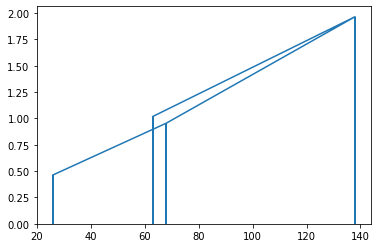

In [ ]:
fig, ax = plt.subplots()
ax.bar(data_cont,data_time)
plt.plot(data_cont,data_time)

# **ANALISIS**

## **Escalabilidad del sistema**

* Los atributos que está considerando procesar
  * **MovieLens 100K** se procesaran los archivos Movie y Ratings, en ambos casos solo 3 campos:
    * Archivo Ratings (id_user,movie_id,rating)
    * Archivo Movies (movie_id,title,tag)
  * **MovieLens 1M** se procesaran los archivos Movie y Ratings, en ambos casos solo 3 campos:
    * Archivo Ratings (id_user,movie_id,rating)
    * Archivo Movies (movie_id,title,tag)

* El número de registros que ingresan a sus diferentes funciones
  * **MovieLens 100K** en cada funcion ingresan dos arreglos con la cantidad de peliculas calificadas por dos usuarios.
  * **MovieLens 1M** en cada funcion ingresan dos arreglos con la cantidad de peliculas calificadas por dos usuarios.
* La dimensionalidad de los registros que ingresan a sus diferentes funciones.
  * **MovieLens 100K**: la dimension de los registros es de 2 ya que se enumeran como pares de elementos (id_movie,rating) esto ubicado en un arreglo
  * **MovieLens 1M**: la dimension de los registros es de 2 ya que se enumeran como pares de elementos (id_movie,rating) esto ubicado en un arreglo
* El tiempo de ejecución para cada función
  * MovieLens 100K
    * Usuario 414 con 2698 peliculas
    * Manhattan: Usuario 414 con extraccion de 100 y 200 peliculas recomendadas
    * Euclidean: Usuario 414 con extraccion de 100 y 200 peliculas recomendadas
    * Pearson: Usuario 414 con extraccion de 100 y 200 peliculas recomendadas
    * Coseno: Usuario 414 con extraccion de 100 y 200 peliculas recomendadas
  * MovieLens 1M 
    * Usuario 4169 con 2314 peliculas
    * Manhattan: Usuario 4169 con extraccion de 100 y 200 peliculas recomendadas
    * Euclidean: Usuario 4169 con extraccion de 100 y 200 peliculas recomendadas
    * Pearson: Usuario 4169 con extraccion de 100 y 200 peliculas recomendadas
    * Coseno: Usuario 4169 con extraccion de 100 y 200 peliculas recomendadas


In [ ]:
def time_med(user,users,fun,cont_film=100,umbral=3):
  d_t = []
  d_d = []
  data_movie = list(set(list(data_movies.keys())).symmetric_difference(list(data[user].keys())))[:cont_film]
  data_movie.sort(key = int) #Ordenamos por orden de pelicula
  for movie_id in data_movie:
      #medimos el tiempo en esta seccion para cada pelicula recomendada
      t_start = time.time()
      name,point = influence_grade(user,movie_id,users,funtion=fun)
      if point>=umbral:
        d_d.append(int(movie_id))
        d_t.append(time.time()-t_start)
  return d_d,d_t


En esta seccion Analizamos al Usuario 414 con cada funcion de distancia y correlacion, evaluado a 100 peliculas. Usando la base de datos con 100K de ratings

\

Los resultados muestran que las funciones de pearson como anteriormente ya vimos tarda mas que las otras funciones que realizan menores operaciones algebraicas

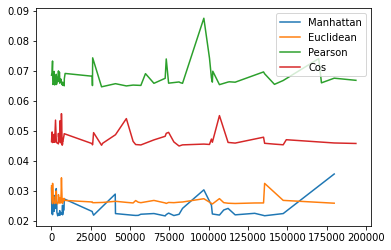

In [ ]:
d_man,t_man = time_med('414',data,manhattan,100)
d_euc,t_euc = time_med('414',data,euclidean,100)
d_pea,t_pea = time_med('414',data,pearson_pyt,100)
d_cos,t_cos = time_med('414',data,cos_python,100)

plt.plot(d_man,t_man,label="Manhattan")
plt.plot(d_euc,t_euc,label="Euclidean")
plt.plot(d_pea,t_pea,label="Pearson")
plt.plot(d_cos,t_cos,label="Cos")
plt.legend()

Caso evaluado con relacion a 200 peliculas recomendadas al usuario 414. En este caso se puede observar que la funcion manhattan tarda mas cuando los datos se encuentran mas dispersos.

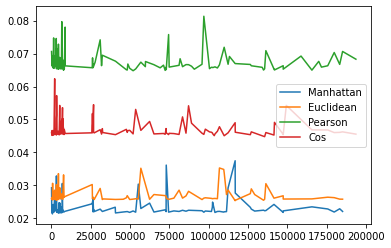

In [ ]:
d_man,t_man = time_med('414',data,manhattan,200)
d_euc,t_euc = time_med('414',data,euclidean,200)
d_pea,t_pea = time_med('414',data,pearson_pyt,200)
d_cos,t_cos = time_med('414',data,cos_python,200)

plt.plot(d_man,t_man,label="Manhattan")
plt.plot(d_euc,t_euc,label="Euclidean")
plt.plot(d_pea,t_pea,label="Pearson")
plt.plot(d_cos,t_cos,label="Cos")
plt.legend()

En esta seccion Analizamos al Usuario 4169 con cada funcion de distancia y correlacion, evaluado a 100 peliculas. Usando la base de datos con 1M de ratings

\

En este caso las funciones tardan mas tiempo ya que la cantidad de ratings por usuario aumentaron por lo cual se realizan mas operaciones.

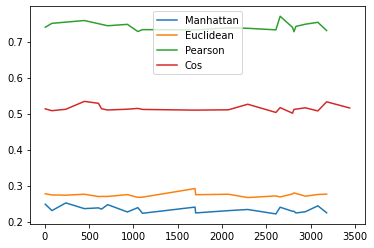

In [ ]:
d_man,t_man = time_med('4169',data_1m,manhattan,100)
d_euc,t_euc = time_med('4169',data_1m,euclidean,100)
d_pea,t_pea = time_med('4169',data_1m,pearson_pyt,100)
d_cos,t_cos = time_med('4169',data_1m,cos_python,100)

plt.plot(d_man,t_man,label="Manhattan")
plt.plot(d_euc,t_euc,label="Euclidean")
plt.plot(d_pea,t_pea,label="Pearson")
plt.plot(d_cos,t_cos,label="Cos")
plt.legend()

Evaluando 200 peliculas recomendadas para el usuario 4169.

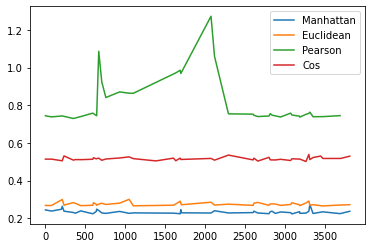

In [ ]:
d_man,t_man = time_med('4169',data_1m,manhattan,200)
d_euc,t_euc = time_med('4169',data_1m,euclidean,200)
d_pea,t_pea = time_med('4169',data_1m,pearson_pyt,200)
d_cos,t_cos = time_med('4169',data_1m,cos_python,200)

plt.plot(d_man,t_man,label="Manhattan")
plt.plot(d_euc,t_euc,label="Euclidean")
plt.plot(d_pea,t_pea,label="Pearson")
plt.plot(d_cos,t_cos,label="Cos")
plt.legend()

## **Esparcidad de los Datos**

La matriz esparza generada por el dataset tiene las dimensiones de:
* filas  = Numero de Usuarios
* columnas = Numero de peliculas

Al encontrarse almacenada en diccionarios esta no retiene valores innecesarios, solo los datos que se registran es decir ningun valor **nan**

\

**Datos ingresados a las funciones**\
Los datos que ingresan a las funciones de distancia y correlacion son dos vectores de filas uno por cada usuario. Asi mismo dentro de las funciones solo se relacionan los valores de las intersecciones de los vectores.

**Las dimensiones que se procesan son:** 2 dimensiones. Al estar indexado por id_usuarios y id_peliculas es mas facil extraer los datos.


In [ ]:
# MEJOR CASO
start = time.time()
evaluate_influence('414',data,cont_film=10,funtion=manhattan)
print(time.time()-start)

0.24724626541137695


In [ ]:
# MEDIO CASO
# MEJOR CASO
start = time.time()
evaluate_influence('414',data,cont_film=1000,funtion=manhattan)
print(time.time()-start)

23.26235270500183


In [ ]:
# PEOR CASO
# MEJOR CASO
start = time.time()
evaluate_influence('414',data,cont_film=5000,funtion=manhattan)
print(time.time()-start)


115.35088968276978


**Conclusion de mejor, medio y peor caso**\
Como se puede ver el tiempo promedio de la prediccion de puntuacion por pelicula es de una decima de segundo por lo tanto mientras mas peliculas se desee recomendar el tiempo de prediccion tarda mas.


In [ ]:
a_size = []
a_siz = []
for i in data:
  a_size.append((len(data[i].keys()),i))
  a_siz.append(len(data[i].keys()))
a_size.sort()
print(min(a_size))
print(max(a_size))


(0, '4169')
(8517, '611')


In [ ]:
a_size = []
a_siz = []
for i in data_1m:
  a_size.append((len(data_1m[i].keys()),i))
  a_siz.append(len(data_1m[i].keys()))
a_size.sort()
print(min(a_size))
print(max(a_size))


(20, '1351')
(2314, '4169')


# **Proponer otras medidas para analizar la esparcidad y escalabilidad de los datos**

1.   **Para datos binarios**
  * Emparejamiento simple [0,1] = $\frac{a+d}{a+b+c+d}$
  * Yule2 [-1,1] = $\frac{\sqrt{ad} - \sqrt{bc}}{\sqrt{ad} + \sqrt{bc}}$
2.   **Para datos cuantitativos**
  * Bray-Curtis = $\frac{\sum_{i=1}^{T}|x_{1i}-x_{2i}|}{\sum_{i=1}^{T}(x_{1i}+x_{2i})}$
  * Minkowski = $\sqrt[q]{\sum_{i=1}^{T}|x_{1i}-x_{2i}|^q}$



# **Qué es, cuál es el comportamiento matemático y cuando se usa cada medida se similitud y correlación**

1. **Correlacion de Pearson**
En general la correlación es usada para calcular la asociación entre variables (rasgos) cuando la mayoría, si no todos, presentan más de dos estados, esto la hace apropiada para cuantificar las distancias existentes entre columnas de la matriz .
2. **Similitud del Coseno**
Es una medida de la similitud existente entre dos vectores en un espacio que posee un producto interior con el que se evalúa el valor del coseno del ángulo comprendido entre ellos.
La complejidad de esta medida es cuadrática, lo cual la hace completamente aplicable a problemas del mundo real. 

3. **Manhattan**
La distancia de Manhattan, calculada como la suma de las diferencias absolutas entre unidades para cada variable. Es menos sensible a valores muy grandes o aberrantes, ya que es función de diferencias absolutas en lugar de diferencias al cuadrado, adicionalmente cada variable puede ser estandarizada por su rango.
4. **Euclidean**
Cualquier variable estará acotada en el intervalo (0,1). Además puede dividirse
por la cantidad de variables obteniendo una distancia media que oscilará en este rango y facilita su conversión a similaridad. Esta presenta varios inconvenientes: no está acotada, es sensible a cambios de escalas.

**REFERENCIA**

Demey, Jhonny & Pla, Laura & Vicente Villardon, Jose Luis & Di Rienzo, Julio & Casanoves, Fernando. (2011). MEDIDAS DE DISTANCIA Y SIMILITUD. 

#**Conclusiones**
1. Las medidas de distancia son mas eficientes cuando estas realizan menos operaciones algebraicas, esto ya que todas las funciones usan las intersecciones de las listas.
2. Tener los elementos indexados por dos lados ayuda a encontrar de forma mas rapida los elementos de la interseccion.
3. Para recomendar y predecir la puntuacion de un usuario frente a peliculas que no vio puede tardar una cantidad considerable de tiempo ya que evalua (todas las peliculas menos las peliculas vistas)
4. Usar un fragmento de las peliculas que no vio el usuario ayuda a evaluar de forma mas rapida los elementos y obtener el tiempo promedio.



In [ ]:
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks')
!ls

In [ ]:
!jupyter nbconvert "Topicos en Ciencia de Datos.ipynb" --to pdf